# 6.4 - Visualización con Pandas

https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html


In [1]:
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
import pylab as plt
import seaborn as sns

%matlplotlib inline

UsageError: Line magic function `%matlplotlib` not found.


**Line plot**

2000-01-01    0.222392
2000-01-02   -0.162484
2000-01-03   -0.485605
2000-01-04   -0.381657
2000-01-05   -0.855139
Freq: D, dtype: float64

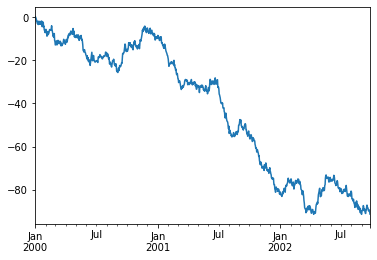

In [2]:
df = pd.Series(np.random.randn(1000), index = pd.date_range('1/1/2000', periods = 1000))

display(df.head())

df = df.cumsum()

df.plot();

,a,b,c,d
2000-01-01,-0.202996,0.456355,0.314724,-0.773443
2000-01-02,0.264131,-1.671012,0.690326,-0.548337
2000-01-03,0.712538,0.039075,1.129997,0.262886
2000-01-04,0.300805,-0.408391,0.118256,-0.245003
2000-01-05,-2.053023,2.014539,1.444650,-1.640137


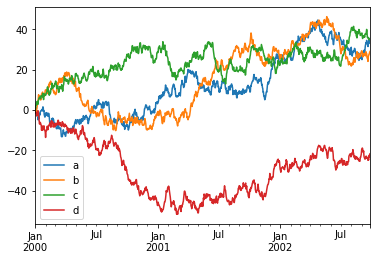

In [3]:
df = pd.DataFrame(np.random.randn(1000, 4), index = pd.date_range('1/1/2000', periods = 1000),
                 columns = ['a', 'b', 'c', 'd'])

display(df.head())

df = df.cumsum()

df.plot();

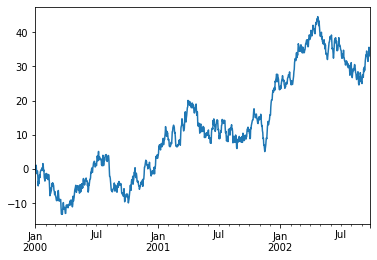

In [4]:
df.a.plot();

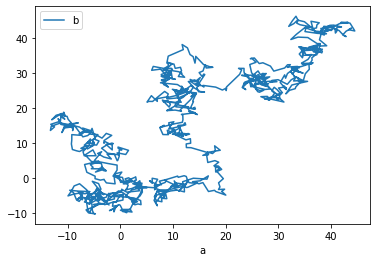

In [5]:
df.plot(x = 'a', y='b');

**Bar plot**

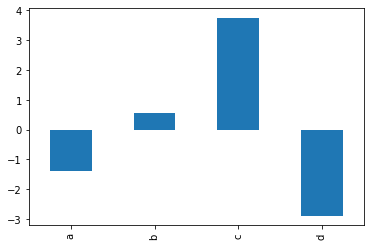

In [6]:
df.iloc[5].plot(kind='bar');

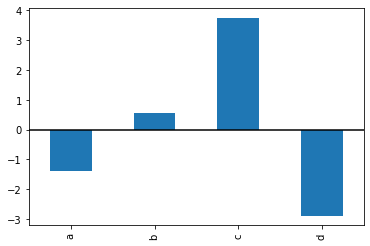

In [7]:
df.iloc[5].plot(kind='bar')

plt.axhline(0, color='k');

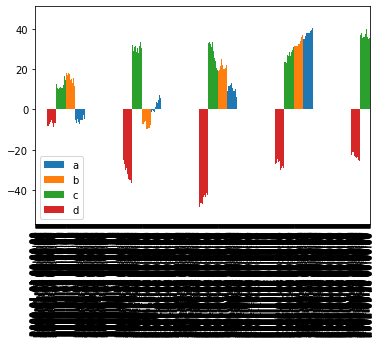

In [8]:
df.plot.bar();

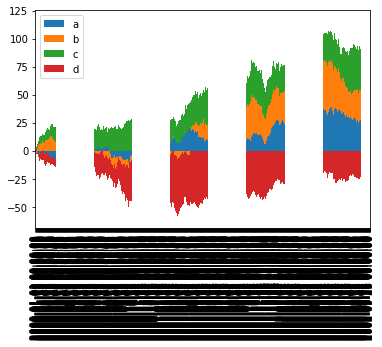

In [9]:
df.plot.bar(stacked=True);

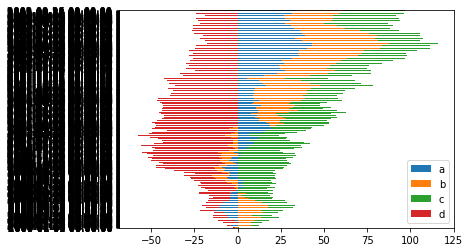

In [10]:
df.plot.barh(stacked=True);

**Histograma**

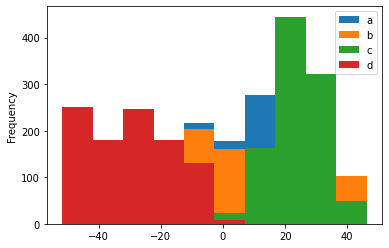

In [11]:
df.plot.hist();

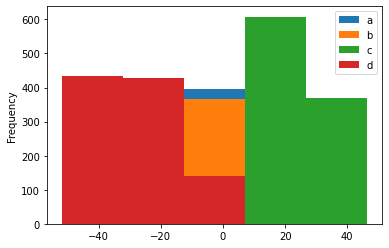

In [12]:
df.plot.hist(bins=5);

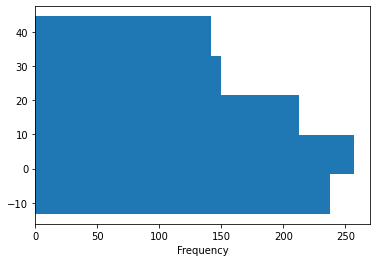

In [13]:
df.a.plot.hist(bins=5, orientation='horizontal',);

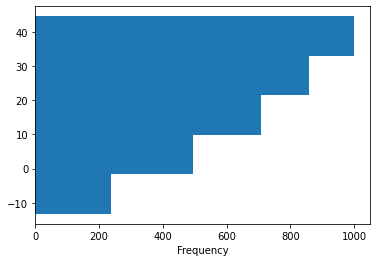

In [14]:
df.a.plot.hist(bins=5, orientation='horizontal', cumulative=True);

**Box plots**

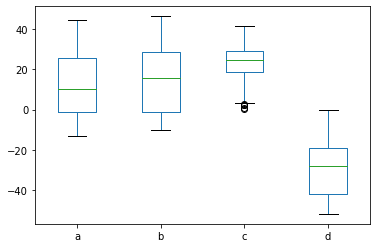

In [15]:
df.plot.box();

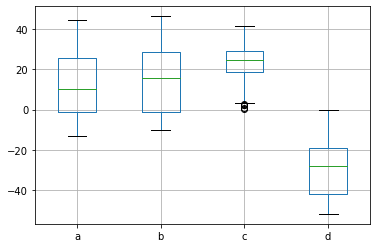

In [16]:
df.boxplot();

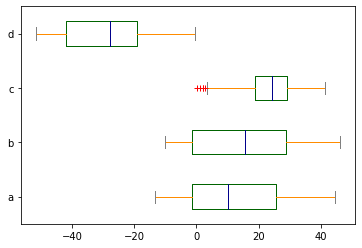

In [17]:
color={'boxes':'DarkGreen',
      'whiskers': 'Darkorange',
      'medians': 'DarkBlue',
      'caps': 'Gray'}

df.plot.box(color = color,
           sym = 'r+',
           vert=False);

**Area plot**

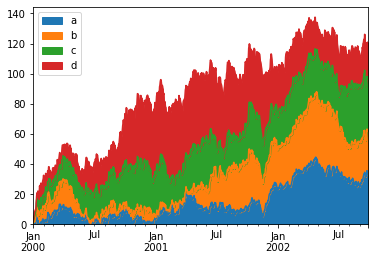

In [18]:
df = df.apply(lambda x: abs(x)) #poner todos los valores en valor absoluto

df.plot.area();

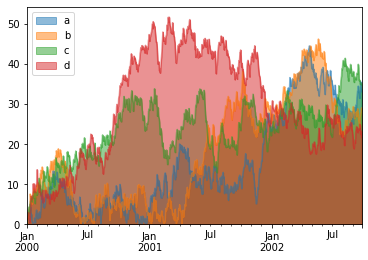

In [19]:
df.plot.area(stacked=False); #en caso de existir valores negativos

**Scatter plot**

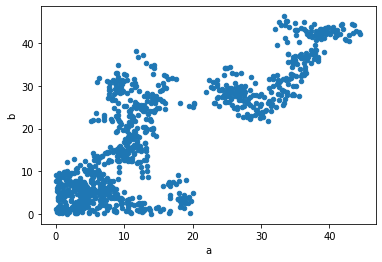

In [20]:
df.plot.scatter(x='a', y='b');

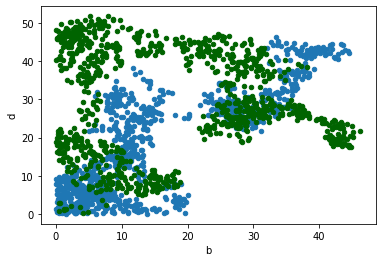

In [21]:
ax_ = df.plot.scatter(x='a', y='b')

df.plot.scatter(x='b', y='d', color = 'DarkGreen', ax = ax_);

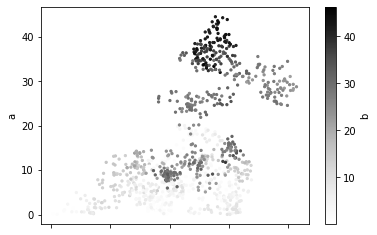

In [22]:
df.plot.scatter(x='c', y='a', c='b', s= 5);

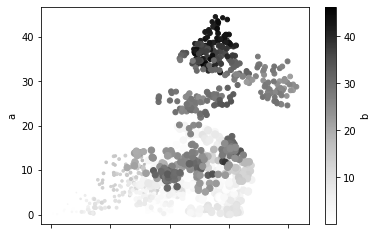

In [23]:
df.plot.scatter(x='c', y='a', c='b', s= df.d);

**Hexagonal bin plot**

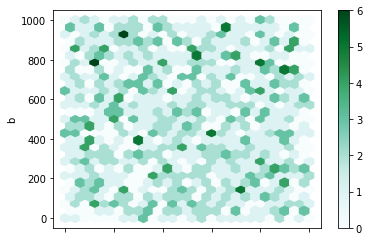

In [24]:
df = pd.DataFrame(np.random.rand(1000, 2), columns = ['a', 'b']) #cloropletas

df['b'] = df['b']+np.arange(1000)

df.plot.hexbin(x='a', y = 'b', gridsize=25);

**Pie plot**

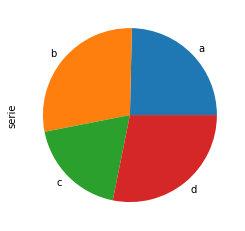

In [25]:
serie = pd.Series(3 * np.random.rand(4), index= ['a', 'b', 'c', 'd'], name='serie')

serie.plot.pie();

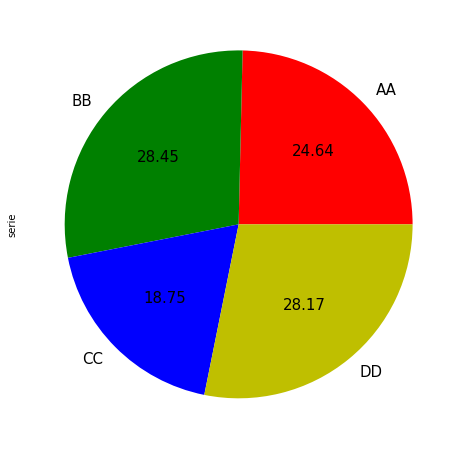

In [26]:
serie.plot.pie(labels = ['AA', 'BB', 'CC', 'DD'],
              colors = ['r', 'g', 'b', 'y'],
              autopct = '%.2f',
              fontsize = 15,
              figsize = [8,8]);

In [27]:
df = pd.DataFrame(3*np.random.rand(4,2))

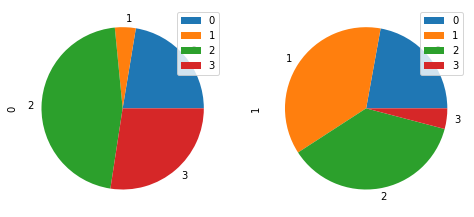

In [28]:
df.plot.pie(subplots = True, figsize=(8,4));

**Scatter matrix plot**

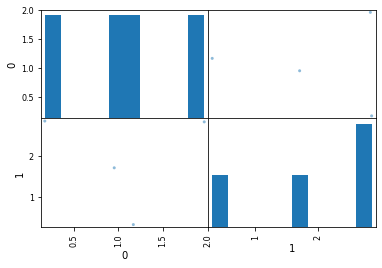

In [29]:
pd.plotting.scatter_matrix(df);

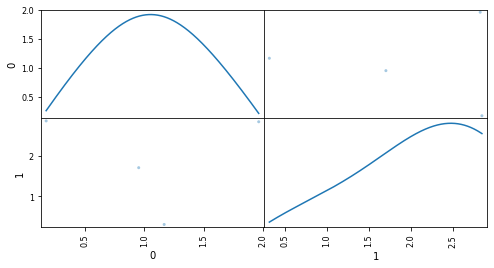

In [30]:
pd.plotting.scatter_matrix(df,
                          alpha=0.4, # transparencia
                           figsize = (8,4),
                           diagonal = 'kde' # kernel density estimator
                          );

**curvas de Andrews**

In [31]:
data = sns.load_dataset('iris')
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [32]:
from pandas.plotting import andrews_curves

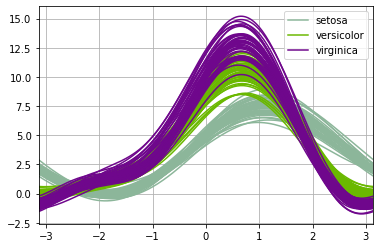

In [33]:
andrews_curves(data, 'species');

**coordenadas paralelas**

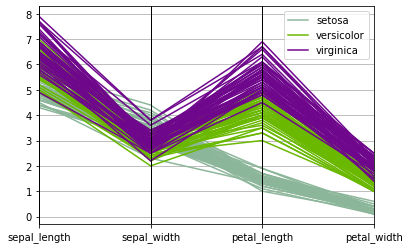

In [34]:
from pandas.plotting import parallel_coordinates

parallel_coordinates(data, 'species');

# Extensiones para Jupyter


### Lux

https://github.com/lux-org/lux-widget

https://stackoverflow.com/questions/68046925/how-can-i-make-the-lux-package-work-in-python

In [35]:
!pip install lux-api

In [36]:
import lux
import pandas as pd

In [37]:
df = pd.read_csv('../data/student-por.csv', sep=';')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


### QGrid

https://github.com/quantopian/qgrid

In [38]:
# Qgrid

In [39]:
!pip install qgrid

In [41]:
import qgrid

In [42]:
q_df = qgrid.show_grid(df, show_toolbar=True)

q_df

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

### iTables

https://github.com/mwouts/itables

In [43]:
!pip install itables
!pip install world_bank_data

  Created wheel for world-bank-data: filename=world_bank_data-0.1.3-py3-none-any.whl size=11111 sha256=55081993c38c4b5e94683946a1a5b2c4e07f61affd3228ea33a33d3dc46d2a01
  Stored in directory: /Users/Kike/Library/Caches/pip/wheels/fe/17/0c/9ef630351acc5856f4a1814d96bc082eccf1cbbb779fcd1a98
Successfully built world-bank-data


In [45]:

from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

from itables import show

import world_bank_data as wb

<IPython.core.display.Javascript object>

### Jupyter DataTables

https://github.com/CermakM/jupyter-datatables

### ipyvolume

https://github.com/maartenbreddels/ipyvolume

### bqplot

https://github.com/bqplot/bqplot

### Atoti

https://docs.atoti.io/latest/tutorial/tutorial.html